# Pairplotting & Clustering Analysis

In [50]:
import pandas as pd
from sklearn.datasets import load_iris, load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Iris Data

In [37]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [43]:
df = pd.concat([X, y], axis=1)

In [44]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Iris Pairplots

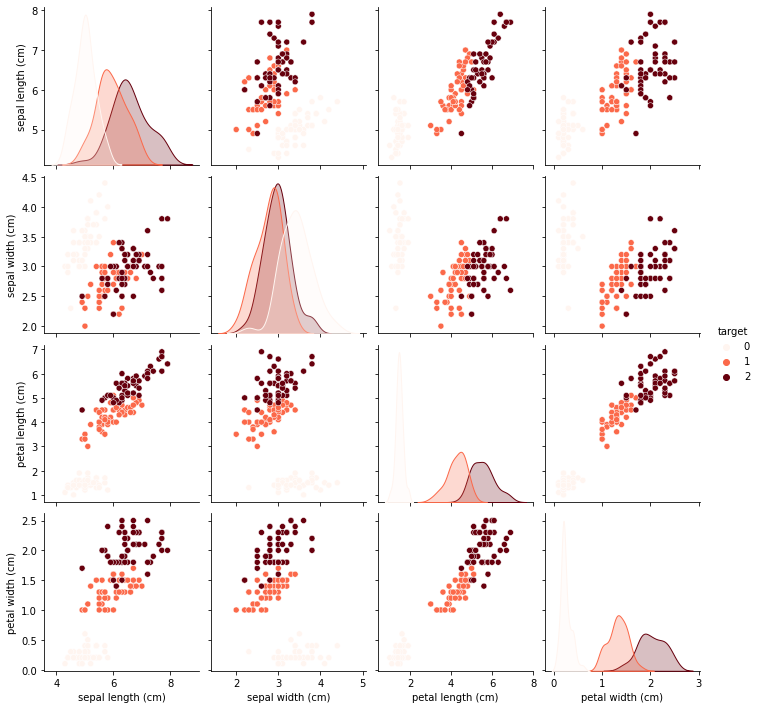

In [69]:
# sns.set(style="ticks", color_codes=True)

#sns.pairplot(iris, hue="Species", palette="husl", markers=["o", "s", "D"])
#sns.pairplot(df, hue="species")

sns.pairplot(df, hue="target", palette="Reds")

## Wine Dataset

In [72]:
from sklearn.datasets import load_wine
data = load_wine()
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [52]:
wine_X, wine_y = load_wine(return_X_y=True, as_frame=True)

In [53]:
wine_df = pd.concat([wine_X, wine_y], axis=1)

In [54]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [58]:
pd.options.display.max_rows = 999

Interestingly, some variables that call out to me are `flavanoids` (whatever they are), `color_intensity`, `proline`, this is because they all have very different means. So I'll plot these are pairplots.

In [59]:
wine_df.groupby(['target']).describe().T

target                                        0           1           2
alcohol                      count    59.000000   71.000000   48.000000
                             mean     13.744746   12.278732   13.153750
                             std       0.462125    0.537964    0.530241
                             min      12.850000   11.030000   12.200000
                             25%      13.400000   11.915000   12.805000
                             50%      13.750000   12.290000   13.165000
                             75%      14.100000   12.515000   13.505000
                             max      14.830000   13.860000   14.340000
malic_acid                   count    59.000000   71.000000   48.000000
                             mean      2.010678    1.932676    3.333750
                             std       0.688549    1.015569    1.087906
                             min       1.350000    0.740000    1.240000
                             25%       1.665000    1.270000    2.587500
                             50%       1.770000    1.610000    3.265000
                             75%       1.935000    2.145000    3.957500
                             max       4.040000    5.800000    5.650000
ash                          count    59.000000   71.000000   48.000000
                             mean      2.455593    2.244789    2.437083
                             std       0.227166    0.315467    0.184690
                             min       2.040000    1.360000    2.100000
                             25%       2.295000    2.000000    2.300000
                             50%       2.440000    2.240000    2.380000
                             75%       2.615000    2.420000    2.602500
                             max       3.220000    3.230000    2.860000
alcalinity_of_ash            count    59.000000   71.000000   48.000000
                             mean     17.037288   20.238028   21.416667
                             std       2.546322    3.349770    2.258161
                             min      11.200000   10.600000   17.500000
                             25%      16.000000   18.000000   20.000000
                             50%      16.800000   20.000000   21.000000
                             75%      18.700000   22.000000   23.000000
                             max      25.000000   30.000000   27.000000
magnesium                    count    59.000000   71.000000   48.000000
                             mean    106.338983   94.549296   99.312500
                             std      10.498949   16.753497   10.890473
                             min      89.000000   70.000000   80.000000
                             25%      98.000000   85.500000   89.750000
                             50%     104.000000   88.000000   97.000000
                             75%     114.000000   99.500000  106.000000
                             max     132.000000  162.000000  123.000000
total_phenols                count    59.000000   71.000000   48.000000
                             mean      2.840169    2.258873    1.678750
                             std       0.338961    0.545361    0.356971
                             min       2.200000    1.100000    0.980000
                             25%       2.600000    1.895000    1.407500
                             50%       2.800000    2.200000    1.635000
                             75%       3.000000    2.560000    1.807500
                             max       3.880000    3.520000    2.800000
flavanoids                   count    59.000000   71.000000   48.000000
                             mean      2.982373    2.080845    0.781458
                             std       0.397494    0.705701    0.293504
                             min       2.190000    0.570000    0.340000
                             25%       2.680000    1.605000    0.580000
                             50%       2.980000    2.030000    0.685000
                             75%       3

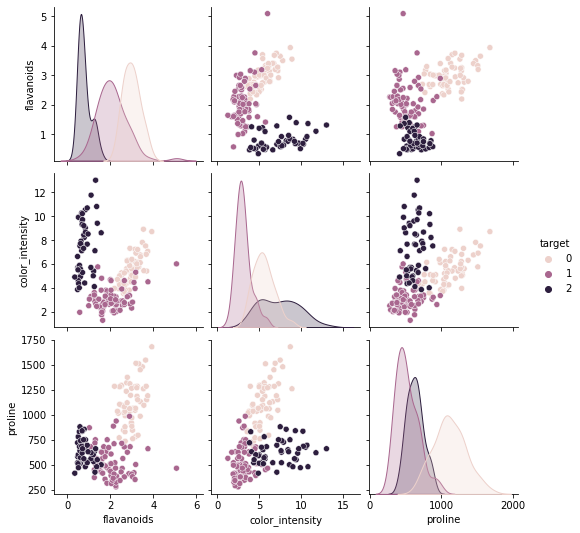

In [65]:
sns.pairplot(wine_df, hue="target", vars=['flavanoids', 'color_intensity', 'proline'])